In [1]:
#first we will install nltk library
#!pip install nltk

In [2]:
'''nltk.download('wordnet')
nltk.download('averagded_perseptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')'''

"nltk.download('wordnet')\nnltk.download('averagded_perseptron_tagger')\nnltk.download('stopwords')\nnltk.download('punkt')"

In [3]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"C:\Users\pooja\Desktop\softwares\guvi\guvi_projects\final_project\FinalBalancedDataset.csv")
df.head(12)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
5,5,0,[2/2] huge fan fare and big talking before the...
6,6,0,@user camping tomorrow @user @user @user @use...
7,7,0,the next school year is the year for exams.ð...
8,8,0,we won!!! love the land!!! #allin #cavs #champ...
9,9,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
df.columns

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')

In [7]:
del df['Unnamed: 0']

In [8]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
df["tweet"].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [10]:
#importing nltk
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
ps=PorterStemmer()

In [11]:
corpus=[]
for i in range(len(df)):
    rp=re.sub('[^a-zA-Z]'," ",df["tweet"][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[ps.stem(word) for word in rp if not word in set(stopwords.words("english"))]
    rp=" ".join(rp)
    corpus.append(rp)

#### Bag OF words

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
ifidf=TfidfVectorizer()
tf=ifidf.fit_transform(corpus).toarray

### Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus)

In [14]:
y=pd.get_dummies(df["Toxicity"],drop_first=True)

### Train test split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=56)

### Modeling

#### navie bayes classifier with default parameters

In [16]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(x_train,y_train)

MultinomialNB()

### Prediction

In [17]:
ypred_test=model1.predict(x_test)
ypred_train=model1.predict(x_train)

### Evaluation

In [18]:
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Train Acuuracy:",accuracy_score(y_train,ypred_train))
print("Test Acuuracy:",accuracy_score(y_test,ypred_test))
print("r2_score:",r2_score(y_test,ypred_test))
print("f1_score:",f1_score(y_test,ypred_test))
print("precision_score:",precision_score(y_test,ypred_test))
print("recall_score:",recall_score(y_test,ypred_test))

Train Acuuracy: 0.9457881751696184
Test Acuuracy: 0.9162921843334214
r2_score: 0.6578034635848269
f1_score: 0.9046376229672757
precision_score: 0.880078125
recall_score: 0.9306071871127634


In [19]:
from sklearn.metrics import confusion_matrix
model1=confusion_matrix(y_test,ypred_test)
model1

array([[5893,  614],
       [ 336, 4506]], dtype=int64)

### DecesionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
ypred_test=model2.predict(x_test)
ypred_train=model2.predict(x_train)

In [22]:
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Train Acuuracy:",accuracy_score(y_train,ypred_train))
print("Test Acuuracy:",accuracy_score(y_test,ypred_test))
print("r2_score:",r2_score(y_test,ypred_test))
print("f1_score:",f1_score(y_test,ypred_test))
print("precision_score:",precision_score(y_test,ypred_test))
print("recall_score:",recall_score(y_test,ypred_test))

Train Acuuracy: 0.9998458013921931
Test Acuuracy: 0.9354128117014715
r2_score: 0.7359683566396611
f1_score: 0.9232219545406936
precision_score: 0.936663124335813
recall_score: 0.9101610904584883


 #### ROCAUC DecesionTreeClassifier

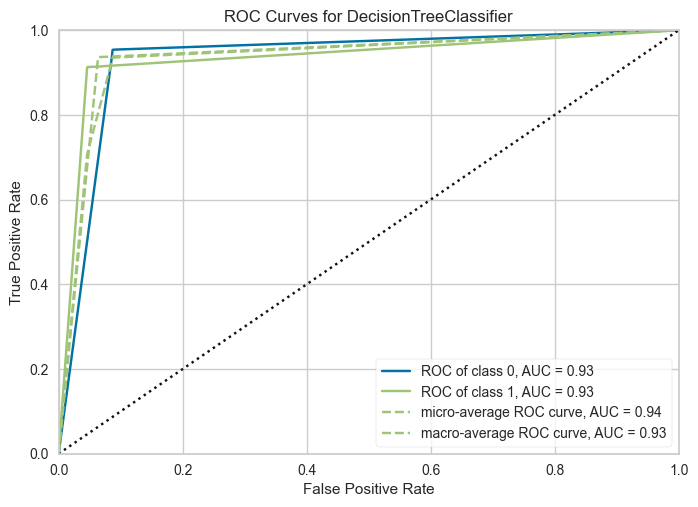

<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model2)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()    

In [24]:
from sklearn.metrics import confusion_matrix
model2=confusion_matrix(y_test,ypred_test)
model2

array([[6209,  298],
       [ 435, 4407]], dtype=int64)

### KNN(k nearest neighbur)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
ypred_test=model3.predict(x_test)
ypred_train=model3.predict(x_train)

In [27]:
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Train Acuuracy:",accuracy_score(y_train,ypred_train))
print("Test Acuuracy:",accuracy_score(y_test,ypred_test))
print("r2_score:",r2_score(y_test,ypred_test))
print("f1_score:",f1_score(y_test,ypred_test))
print("precision_score:",precision_score(y_test,ypred_test))
print("recall_score:",recall_score(y_test,ypred_test))

Train Acuuracy: 0.9299718036831439
Test Acuuracy: 0.8977002379064235
r2_score: 0.5817998118126146
f1_score: 0.8708708708708709
precision_score: 0.9436008676789588
recall_score: 0.8085501858736059


### confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
model3=confusion_matrix(y_test,ypred_test)
model3

array([[6273,  234],
       [ 927, 3915]], dtype=int64)

In [29]:
from sklearn.preprocessing import StandardScaler #scaling is not menadetry for decision tree or random forest
std=StandardScaler()
#x_train=std.fit_transform(x_train)
#x_test=std.transform(x_test)

### Random Forest Classifier

In [30]:
#modeling
from sklearn.ensemble import RandomForestClassifier
model4= RandomForestClassifier(n_estimators=100,max_depth=3,max_features="sqrt")
model4.fit(x_train,y_train) #n_estimators=100 means combinding 100 dt

#prediction
ypred_test=model4.predict(x_test)
ypred_train=model4.predict(x_train)

#accuracy
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Train Acuuracy:",accuracy_score(y_train,ypred_train))
print("Test Acuuracy:",accuracy_score(y_test,ypred_test))
print("r2_score:",r2_score(y_test,ypred_test))
print("f1_score:",f1_score(y_test,ypred_test))
print("precision_score:",precision_score(y_test,ypred_test))
print("recall_score:",recall_score(y_test,ypred_test))

Train Acuuracy: 0.5746541545510617
Test Acuuracy: 0.5733544805709754
r2_score: -0.7441217150760722
f1_score: 0.0
precision_score: 0.0
recall_score: 0.0


#### ROCAUC Random Forest Classifier

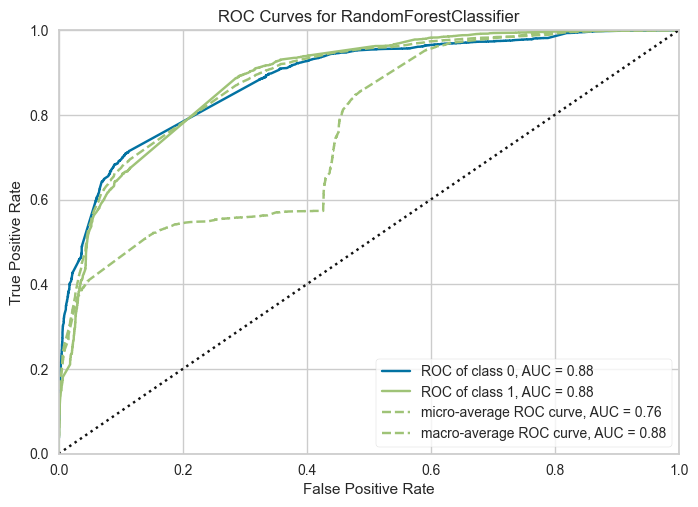

<AxesSubplot: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model4)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

### SVM(SUPPORT VECTORE MACHINES)

In [32]:
#modelling
from sklearn.svm import SVC
model5= SVC()
model5.fit(x_train,y_train)

#prediction
ypred_test=model5.predict(x_test)
ypred_train=model5.predict(x_train)

#accuracy
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Train Acy:",accuracy_score(y_train,ypred_train))
print("Test Acuuracy:",accuracy_score(y_test,ypred_test))
print("r2_score:",r2_score(y_test,ypred_test))
print("f1_score:",f1_score(y_test,ypred_test))
print("precision_score:",precision_score(y_test,ypred_test))
print("recall_score:",recall_score(y_test,ypred_test))


Train Acuuracy: 0.981936734514054
Test Acuuracy: 0.9429905718565512
r2_score: 0.7669461483572453
f1_score: 0.9308982163836377
precision_score: 0.9639460296394603
recall_score: 0.9000413052457662


### ROCAUC for SVM(SUPPORT VECTORE MACHINES)

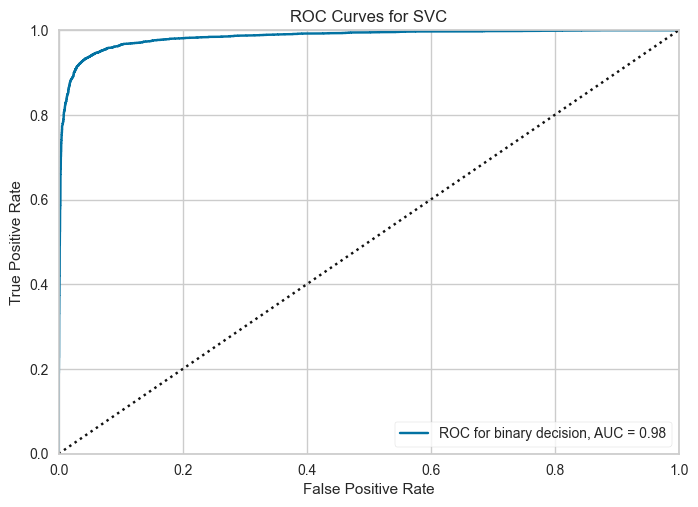

<AxesSubplot: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [33]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model5,binary=True)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()    

### HYPERPARAMETER TUNING

In [34]:
from sklearn.model_selection import GridSearchCV
estimator=SVC()
#param_grid={'C':[0.01,0.1,10,100],"kernel":["linear","rbf","sigmoid","poly"]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x,y)

NameError: name 'param_grid' is not defined

In [ ]:
grid.best_params_

### Rebuilding the SVM model with best parameters

In [ ]:
model5=SVC(kernel="linear",C=1)
model5.fit(x_train,y_train)


y_pred_test=model4.predict(x_test)
y_pred_train=model4.predict(x_train)

#accuracy
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Train Acuuracy:",accuracy_score(y_train,ypred_train))
print("Test Acuuracy:",accuracy_score(y_test,ypred_test))
print("r2_score:",r2_score(y_test,ypred_test))
print("f1_score:",f1_score(y_test,ypred_test))
print("precision_score:",precision_score(y_test,ypred_test))
print("recall_score:",recall_score(y_test,ypred_test))

In [ ]:
#from sklearn.model_selection import cross_val_score
#for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    #model5=xgb.XGBClassifier(learning_rate=lr,n_estimatores=100,verbosity=0)
    #mdel5.fit(x_train,y_train)
    #model5.score(x_train,y_train)

In [ ]:
#model5=xgb.XGBClassifier(learning_rate=0.05,n_estimatores=100,verbosity=0)
#mdel5.fit(x_train,y_train)
#model5.score(x_train,y_train)